# AI for HumanForYou

Details for our project are below

## Data Preprocessing

Here, I would import, clean, explore and Feature engineering the different datasets provided to extract meaning from them to ensure that a suitable dataframe for training a model can be prepared.

In [188]:
import numpy as np
import pandas as pd

In [189]:
gen_data = pd.read_csv("general_data.csv")
gen_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [190]:
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

The dataset above describes general details about employees in a country based on information from a survy and their columns include the ones as displayed.

In [191]:
emp_data = pd.read_csv("employee_survey_data.csv")
emp_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [192]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


This dataset touches on other details about all the employees and was gathered based on a survey.

In [193]:
in_time_data = pd.read_csv("in_time.csv")
in_time_data.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [194]:
in_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [195]:
out_time_data = pd.read_csv("out_time.csv")
out_time_data.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [196]:
out_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [197]:
manager_data = pd.read_csv("manager_survey_data.csv")
manager_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [198]:
manager_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


Next, for easy analysis of employee related data, I would put each individual dataset into a single dataframe which I would work with and analyse

In [199]:
merged_data = pd.merge(gen_data, manager_data, on='EmployeeID', how='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [200]:
merged_data = pd.merge(merged_data, emp_data, on='EmployeeID', how='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Before going ahead to merge the columns that relate to the arrival and leaving times of employees, we would go ahead a reformat these datasets in order to find the average working hours for each employee throughout the year of 2015 (january to december)

In [201]:
def summarise_working_hours(df_in, df_out):
    df_in.set_index('Unnamed: 0', inplace=True)
    df_out.set_index('Unnamed: 0', inplace=True)

    df_in = df_in.apply(pd.to_datetime, errors='coerce')
    df_out = df_out.apply(pd.to_datetime, errors='coerce')

    df_in = df_in.dropna(axis=1, how='all')
    df_out = df_out.dropna(axis=1, how='all')

    working_hours = (df_out - df_in).apply(lambda x: x.dt.total_seconds() / 3600, axis=0)

    avg_working_hours = np.round(working_hours.mean(axis=1),1)

    # Create a new DataFrame to hold the summary
    summary_df = pd.DataFrame({
        'EmployeeID': df_in.index,
        'AvgWorkingHours': avg_working_hours
    })

    return summary_df


In [202]:
average_time = summarise_working_hours(in_time_data, out_time_data)
average_time

,EmployeeID,AvgWorkingHours
Unnamed: 0,,
1,1,7.4
2,2,7.7
3,3,7.0
4,4,7.2
5,5,8.0
...,...,...
4406,4406,8.5
4407,4407,6.1
4408,4408,7.7


Now that the average working hours of each employee has been calculated, we would now go ahead to combine this with the rest of the merged data in order to form a single wholisitic dataset.

In [203]:
final_merged_data = pd.merge(merged_data, average_time, on='EmployeeID', how='left')
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [204]:
final_merged_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgWorkingHours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,7.4
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,7.7
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,7.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,7.2
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,8.0


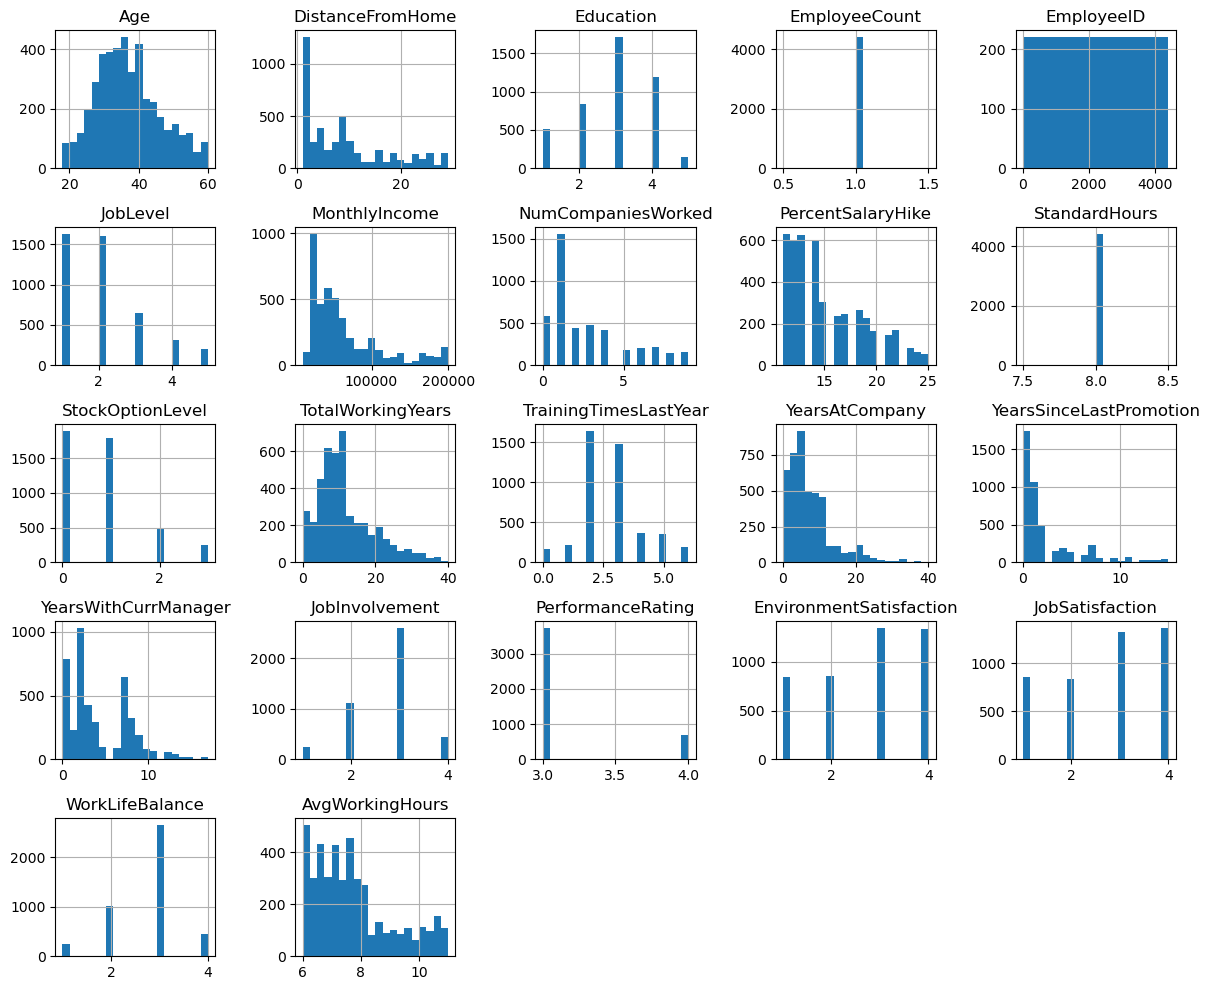

In [205]:
import matplotlib.pyplot as plt

# Plot histograms for every column
final_merged_data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

From observing the structure of the histograms provided per column in the dataset, some of the insights we gathered from this include;

1. Many of the columns, such as DistanceFromHome, TotalWorkingYears, YearsAtCompany, MonthlyIncome, and YearsWithCurrManager, show a skewed distribution, with peaks clustered at specific values or value ranges, majority of which are right-skewed. this observation shows that there are some features in the dataset that are related in some way.

2. The uniform nature structure of the age column shows that majority of employees are around the average age which in this case is about 35 years.

3. The skewed nature of the distanceFromHome column also shows that majority of employees live not too far from home hence do not have to travel far from home.

4. The distribution of MonthlyIncome is heavily right-skewed, meaning most employees earn lower wages, and a smaller number of employees have significantly higher earnings. This correlates with the jobLevel of employees as most employees are lower level employees.

5. Looking at the skew of the averageworking hours column (right skewed) and the standardWorkingHours values (8) it shows that majority of employees work less than the standadrd working hours. This an interesting inference that can be explored.

## Exploratory Data Analysis

Here, I would graphically explore some of the general observations made from the distributions of the dataset above.

**Exploring Age**

Considering the normalised nature of the age column and its small range of ages, we would now explore graphically how age and joblevel and other variables are related.

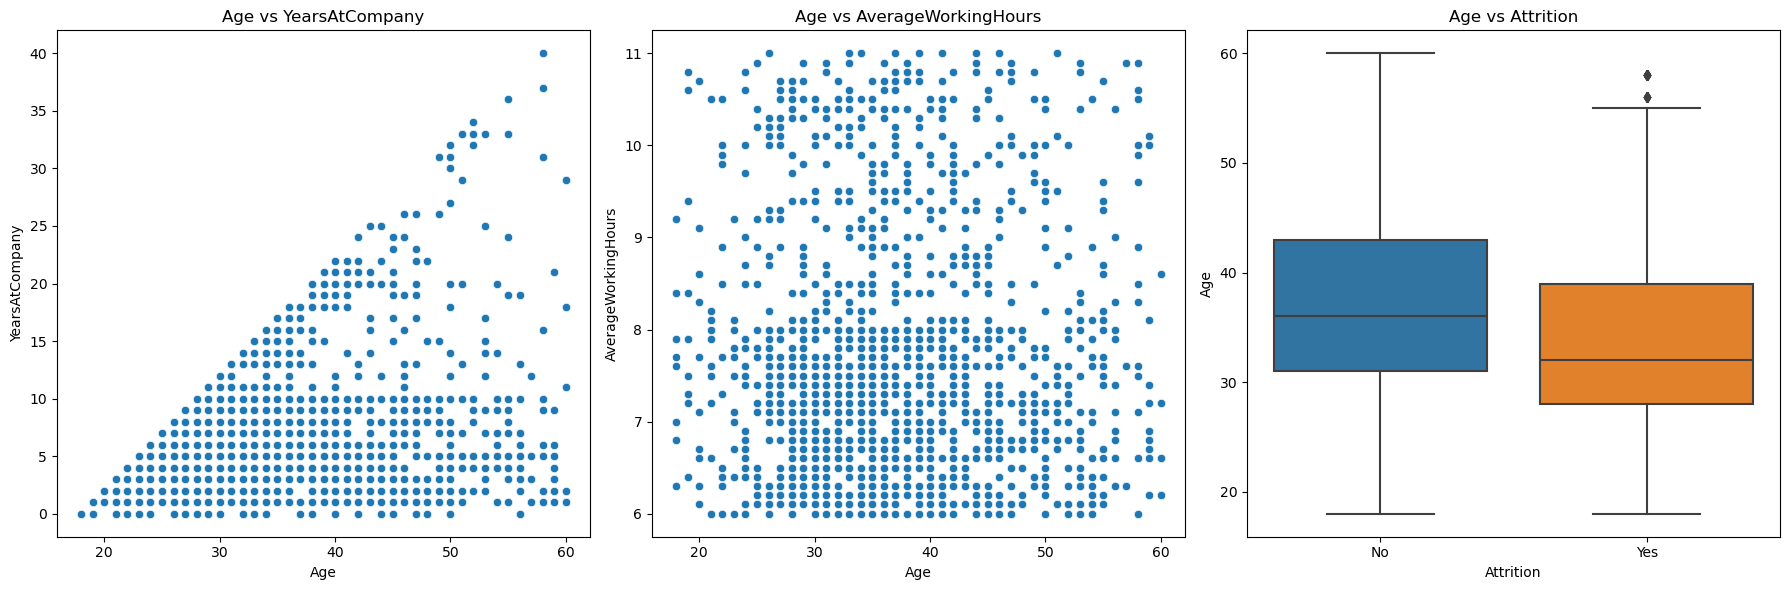

In [206]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x='Age', y='YearsAtCompany', data=final_merged_data, ax=axes[0])
axes[0].set_title('Age vs YearsAtCompany')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('YearsAtCompany')

# Plot Age vs AverageWorkingHours as a scatter plot
sns.scatterplot(x='Age', y='AvgWorkingHours', data=final_merged_data, ax=axes[1])
axes[1].set_title('Age vs AverageWorkingHours')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('AverageWorkingHours')

# Plot Age vs Attrition as a boxplot
sns.boxplot(x='Attrition', y='Age', data=final_merged_data, ax=axes[2])
axes[2].set_title('Age vs Attrition')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Age')

plt.tight_layout()
plt.show()

From observation is seems as though majority of young people in the company left in 2016 and generally seem to be more likely to leave. This is evident from the the boxplot which showed a higher median value for the employees who didn't leave and this is also evident from the positive correlation between YearsAtCompany and Age.

Now we would explore the features that seemed to be skewed to understand if there are any significant outliers that should be viewed or analysed.

In [207]:
final_merged_data.nunique()


Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
JobInvolvement                4
PerformanceRating             2
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
AvgWorkingHours              51
dtype: int64

Now, to explore the columns that might not have been plotted and the rest of the dataset, we would plot the distribution of the categorical variables to understand their general distribution.

In [208]:
categorical_columns = [
    'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 
    'Gender', 'MaritalStatus', 'JobLevel', 'JobRole', 'PerformanceRating', 
    'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Over18', 'JobInvolvement'
]


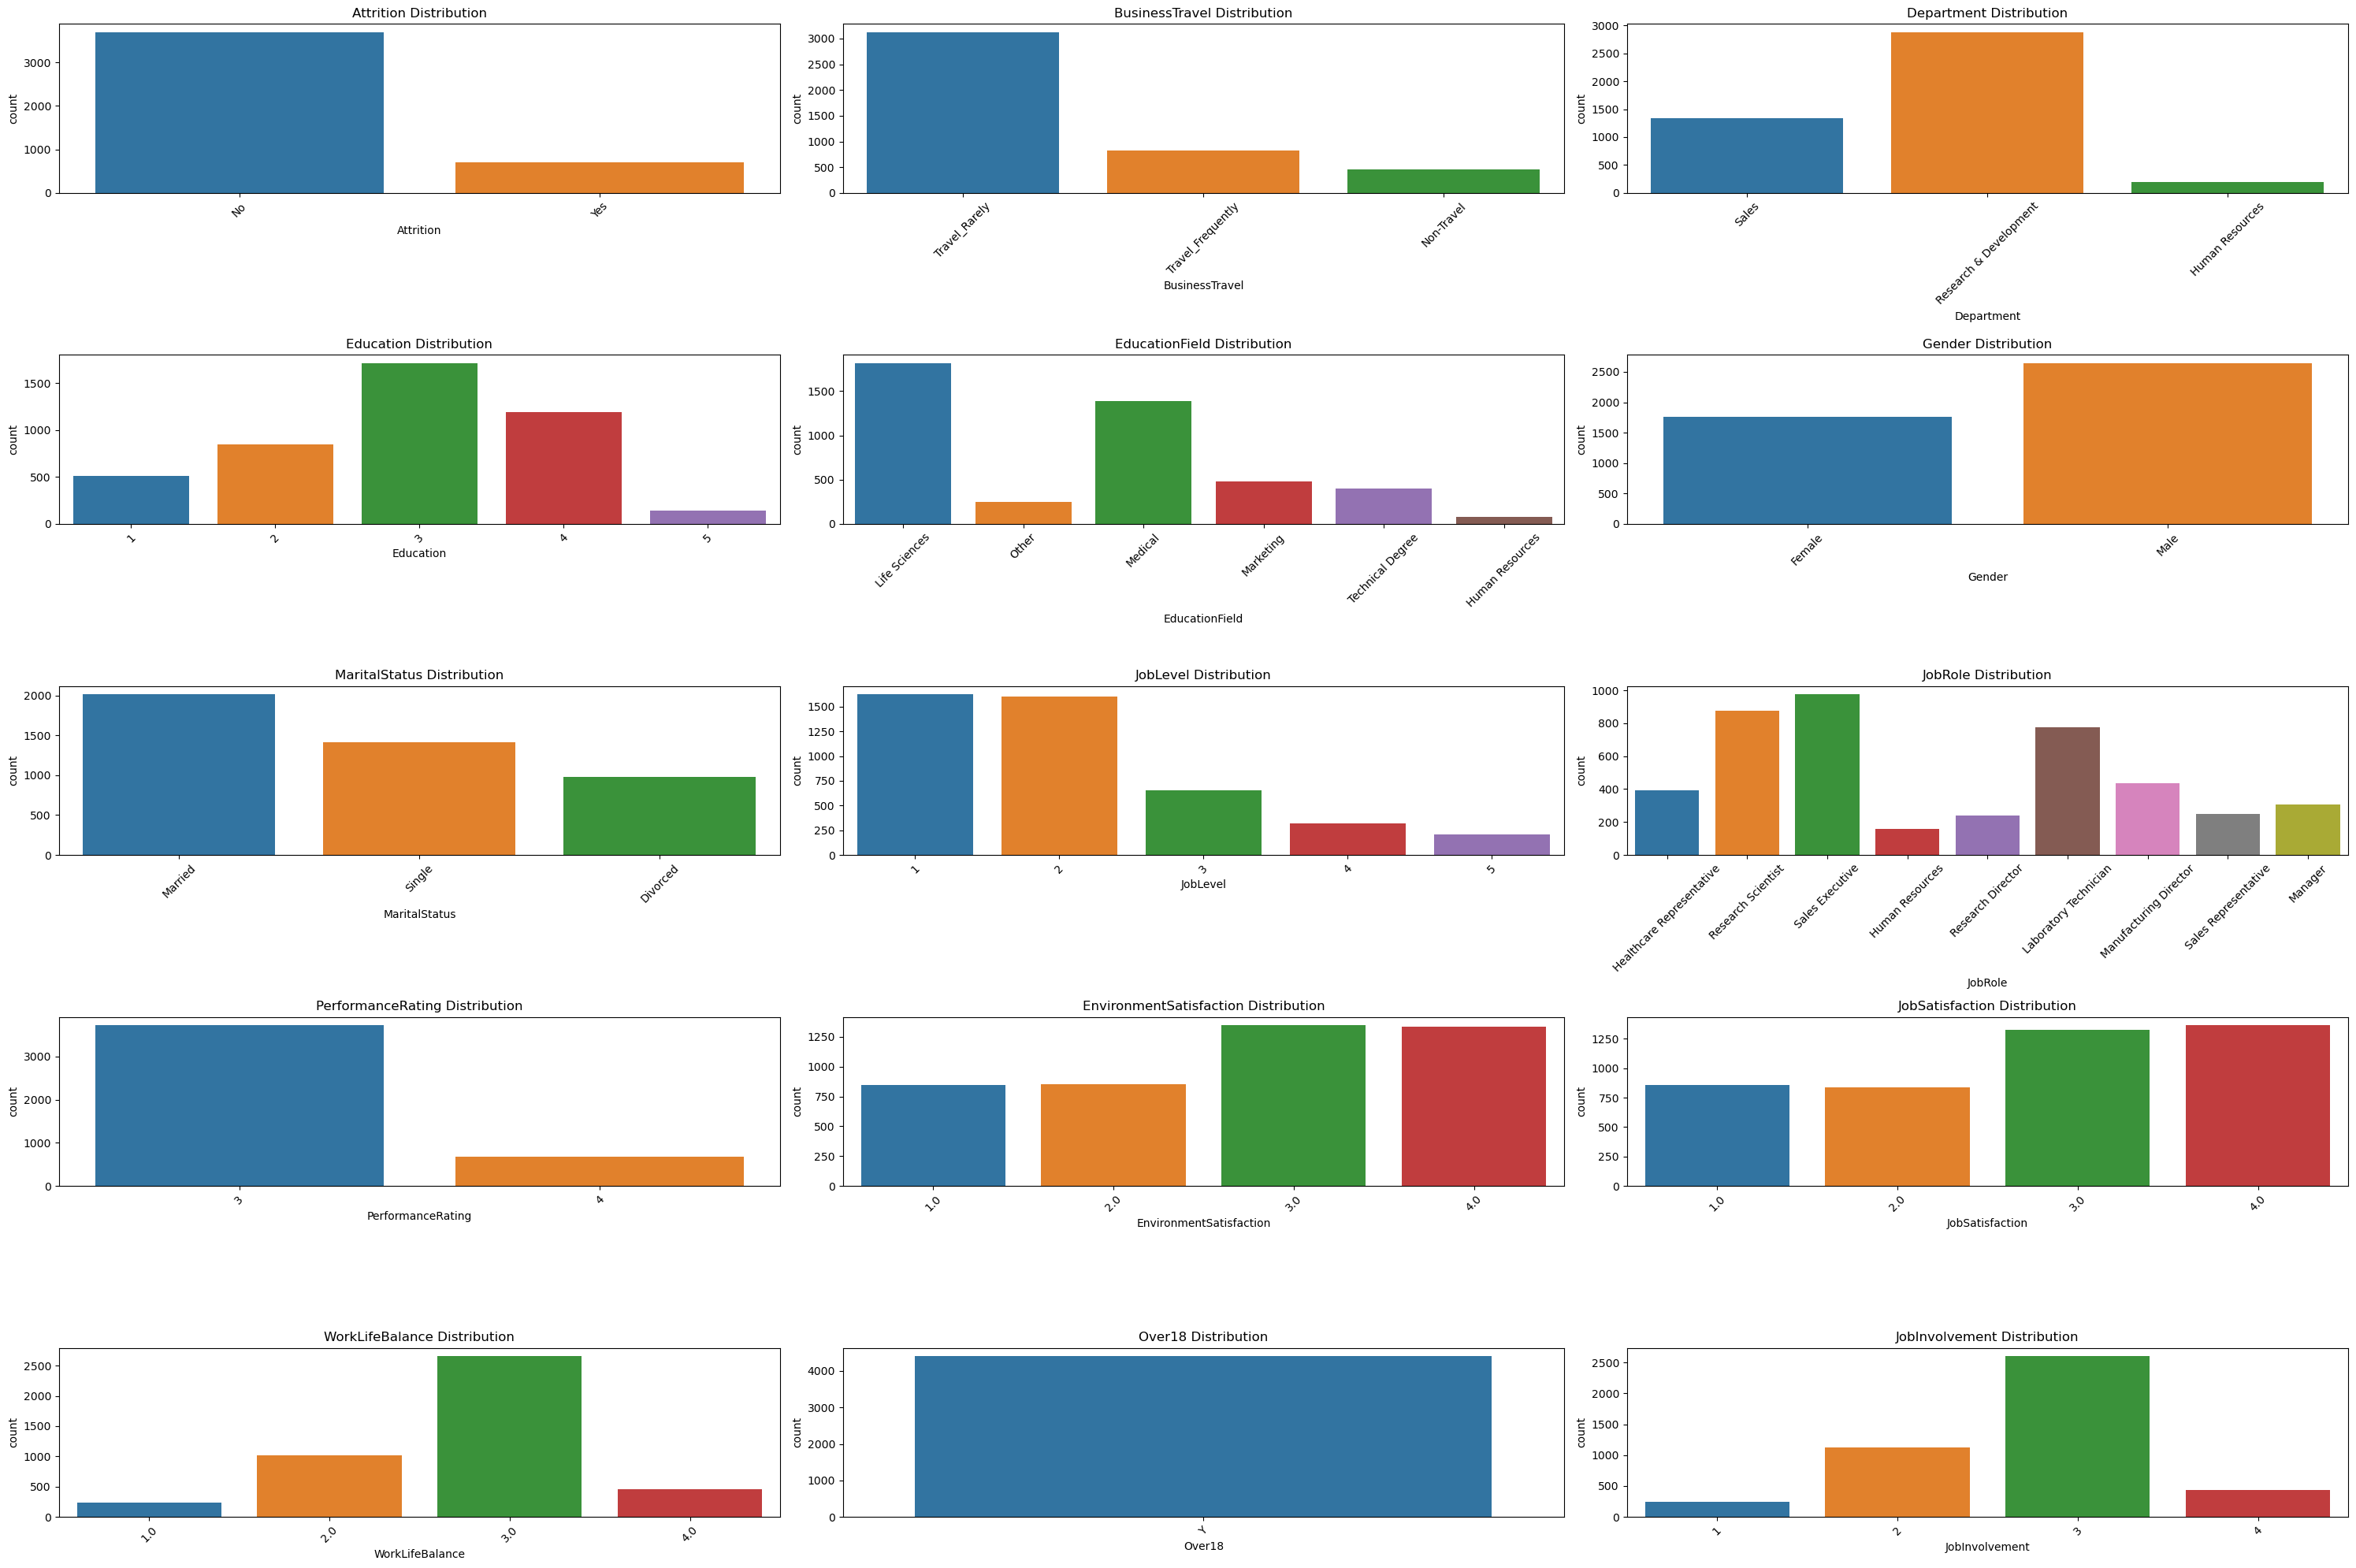

In [209]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))
axes = axes.flatten()

# Loop through the categorical columns and plot count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=final_merged_data, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

From observing the distribution of these graphs, these are some of the insights that can be observed;

1. A large number of individuals stayed in the company than those who left. This makes it more interesting to explore how this correlates with the gender, which is another categorical variable.

2. The Over18 and StandardHours columns would not be so useful considering that all employees are over18 years old.

3. The employees in the company are mostly males. This makes it interesting to explore how the gender correlates with some of the other categorical variables.

In [210]:
final_merged_data.drop('Over18', axis=1, inplace=True)
final_merged_data.drop('StandardHours', axis=1, inplace=True)
final_merged_data.drop('EmployeeCount', axis=1, inplace=True)

In [211]:
categorical_columns = [
    'BusinessTravel', 'Department', 'Education', 'EducationField', 
    'Gender', 'MaritalStatus', 'JobLevel', 'JobRole', 'PerformanceRating', 
    'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement'
]


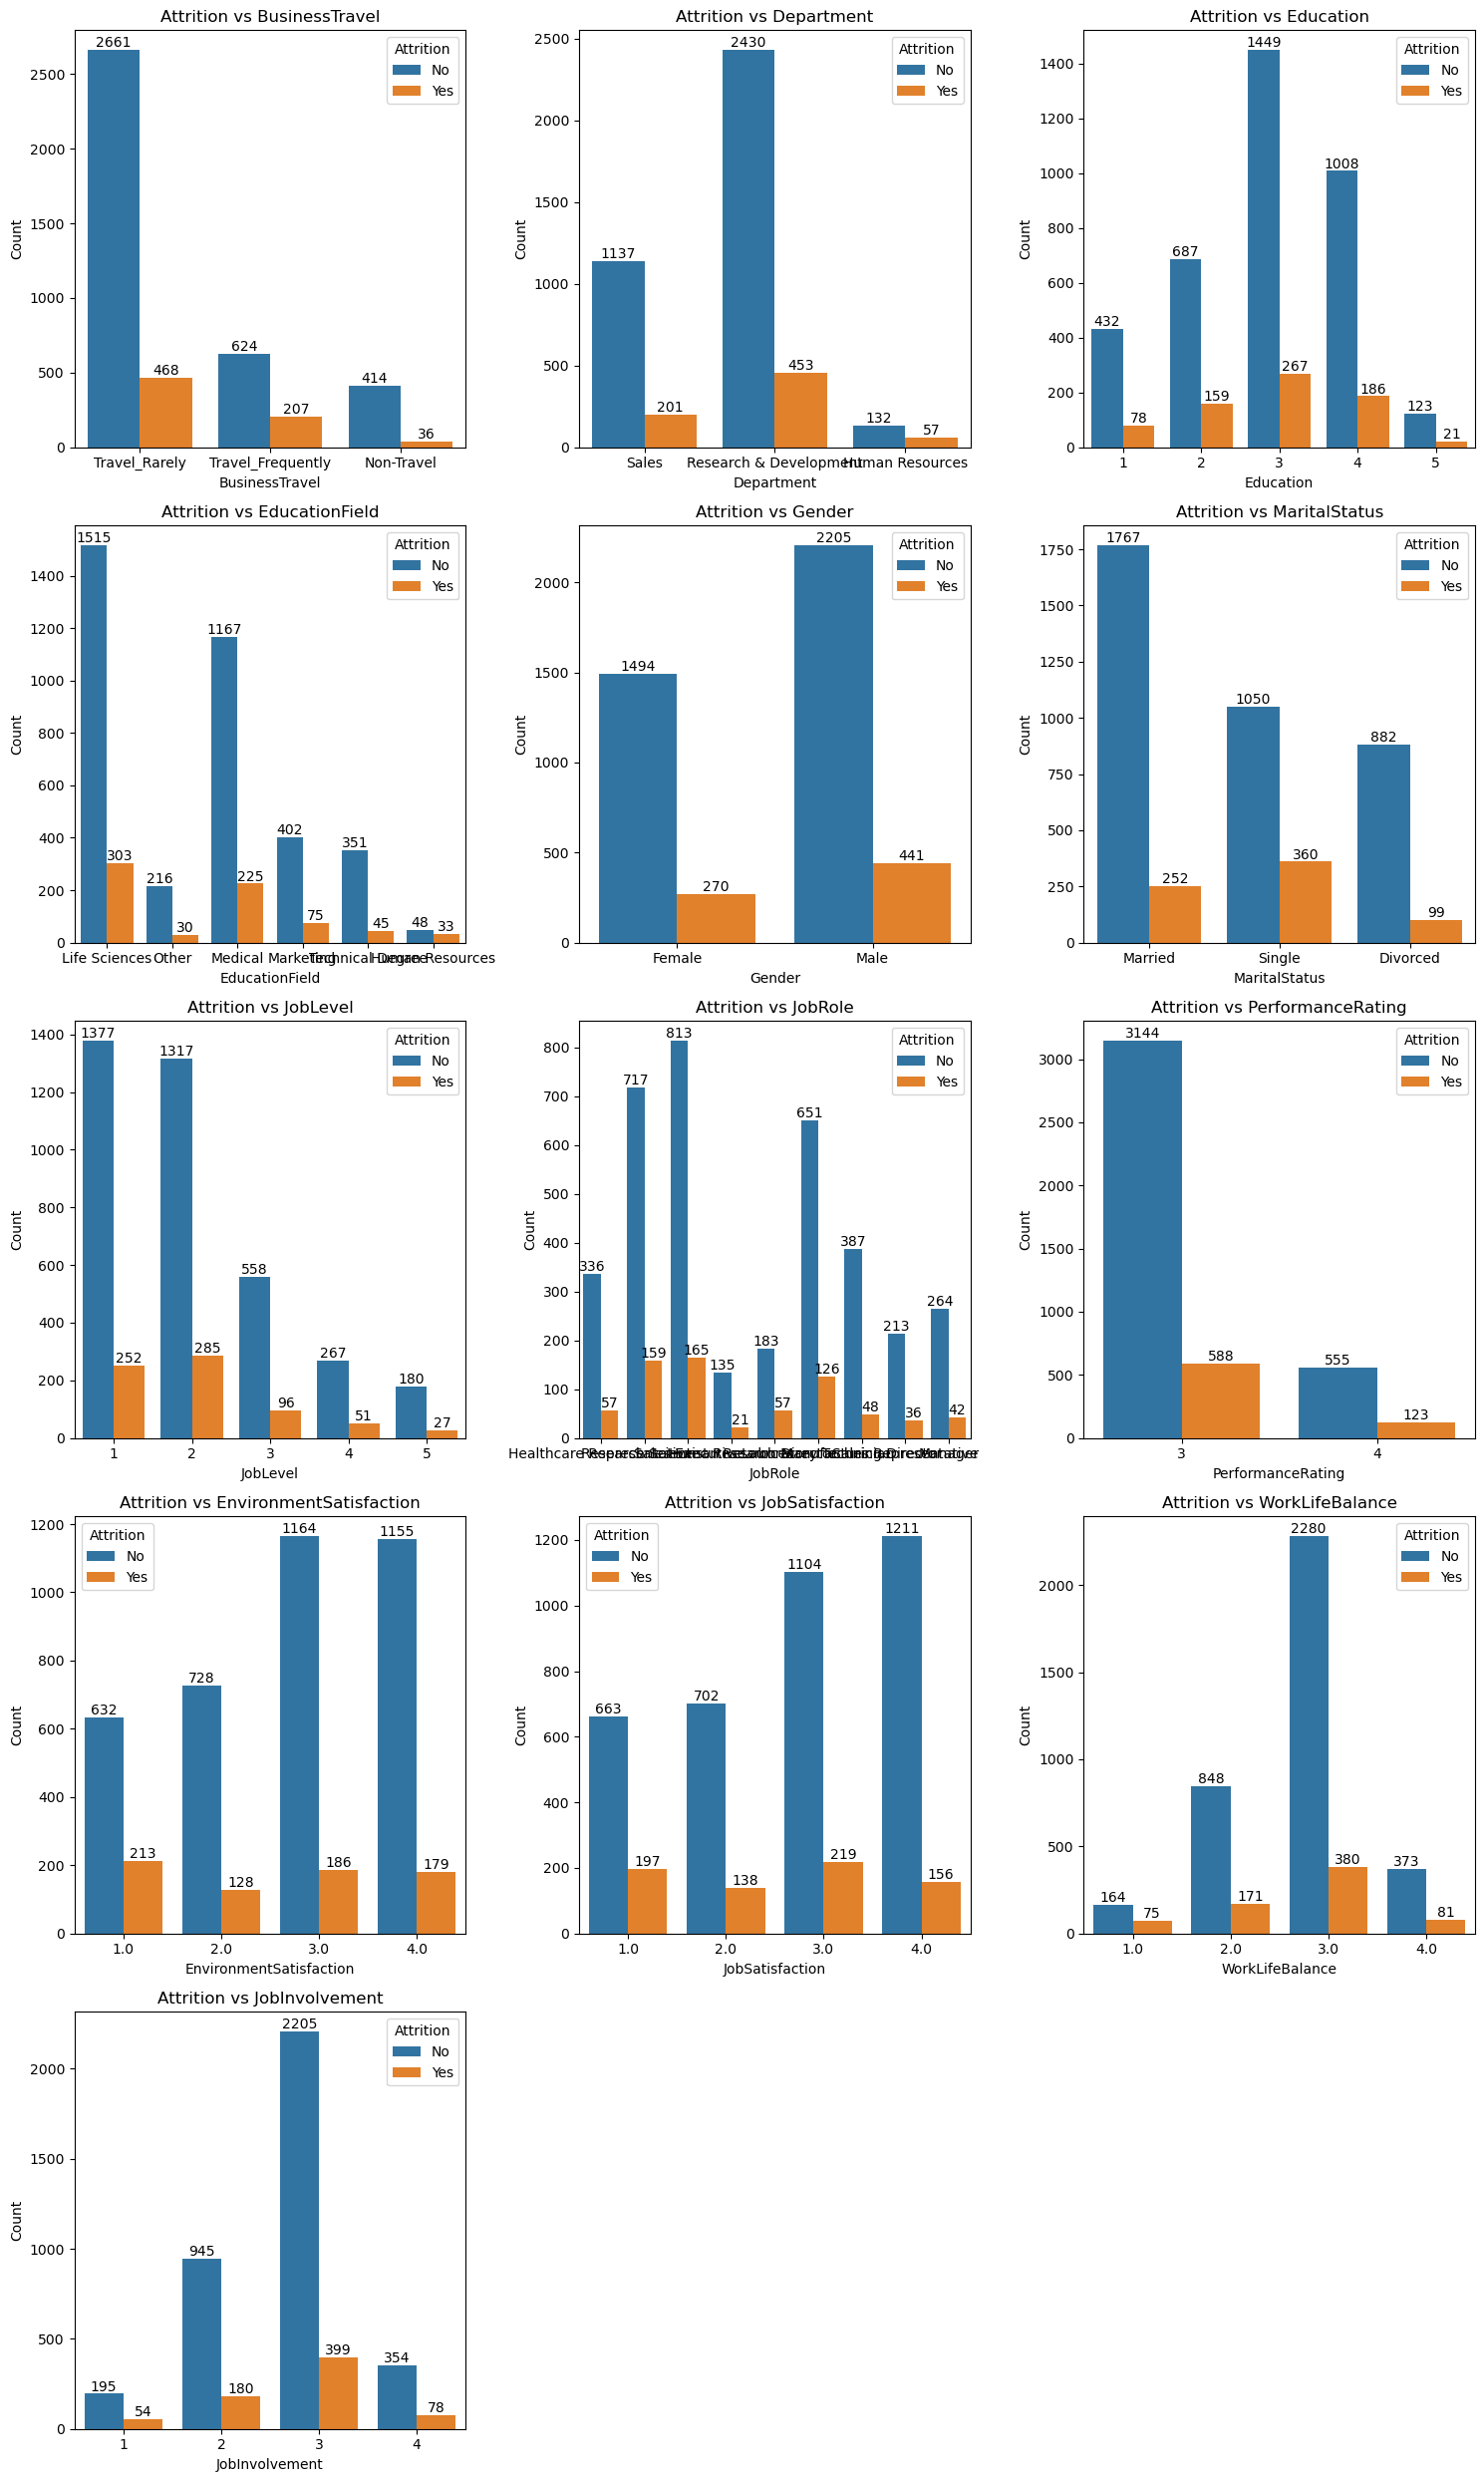

In [212]:
num_columns = len(categorical_columns)
num_rows = (num_columns + 2) // 3

plt.figure(figsize=(15, 5 * num_rows))

for idx, column in enumerate(categorical_columns, start=1):
    plt.subplot(num_rows, 3, idx)
    
    # Plot countplot
    ax = sns.countplot(x=column, hue='Attrition', data=final_merged_data)
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    plt.title(f'Attrition vs {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

From observating the number of male and female employees who left the company in 2016, it is obvious that most individuals who left were men. But the fact that most of the individuals who stayed are also men, this just shows the high count of men who have been involved in the company.

In [213]:
all_columns = final_merged_data.columns

first_9_columns = all_columns[:15]
next_9_columns = all_columns[15:20]
remaining_columns = all_columns[20:]

In [214]:
final_merged_data[first_9_columns].describe()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000
mean,36.923810,9.192517,2.912925,2205.500000,2.063946,65029.312925,2.694830,15.209524
std,9.133301,8.105026,1.023933,1273.201673,1.106689,47068.888559,2.498887,3.659108
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000
max,60.000000,29.000000,5.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000


In [215]:
final_merged_data[next_9_columns].describe()

,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion
count,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000
mean,0.793878,11.279936,2.799320,7.008163,2.187755
std,0.851883,7.782222,1.288978,6.125135,3.221699
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,2.000000,3.000000,0.000000
50%,1.000000,10.000000,3.000000,5.000000,1.000000
75%,1.000000,15.000000,3.000000,9.000000,3.000000
max,3.000000,40.000000,6.000000,40.000000,15.000000


In [216]:
final_merged_data[remaining_columns].describe()

,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgWorkingHours
count,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000
mean,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436,7.701293
std,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245,1.340151
min,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,6.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,6.700000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.400000
75%,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,8.400000
max,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,11.000000


Looking at the statistical description of these columns some interesting sights can be observed and insvestigated.

1. The MonthlyIncome colum has a wide range about 190,000 showing a large spread and is also right skewed as the median is less than the mean. This shows that there are some relatively high paying individuals. This raises an interest to investigate if there is a relationship between high income and attrition. Considering the high disparity, low paying workers might feel under valued which might affect attrition.

2. The Standard working hours column would not be of much use as there is only one value hence, 0 standard deviation. For this reason, this row can be discarded.

3. Looking at the large number of hours between the minimum average working hours and the maximum working hours, it is evident that some employees work much more than others. The low variation based on the standard deviation shows that these individuals who work for large amounts of hours just might be outliers but this raises a concern to investigate if there is a correlation between the working hours and the attrition or job satisfaction.

4. The TotalWorkingYears of employees has a median value of about 11 years which is about over a decade of working while the YearsSinceLastPromotion has a mean value of about 3 years with the 25th percentile beign 0 years meaning that a large number of inividuals have not had a promotion. This provides a reason to explore if there is a correlation or some sort of relationship between the frequency of promotion and the attrition or job satisfaction.

5. The NumCompaniesWorked at column has a median value of 2 and a maximum value of 9 which hints at the fact that some employees have been worked for many companies and these individuals might be outliers which can be explored.

Next I would deal with outliers i.e. determine if outliers should be removed or kept based on the number of outliers above the 99th percentile of the distribution of the numerical column being looked at.

In [217]:
numerical_cols = final_merged_data.select_dtypes(include=['int64', 'float64']).columns

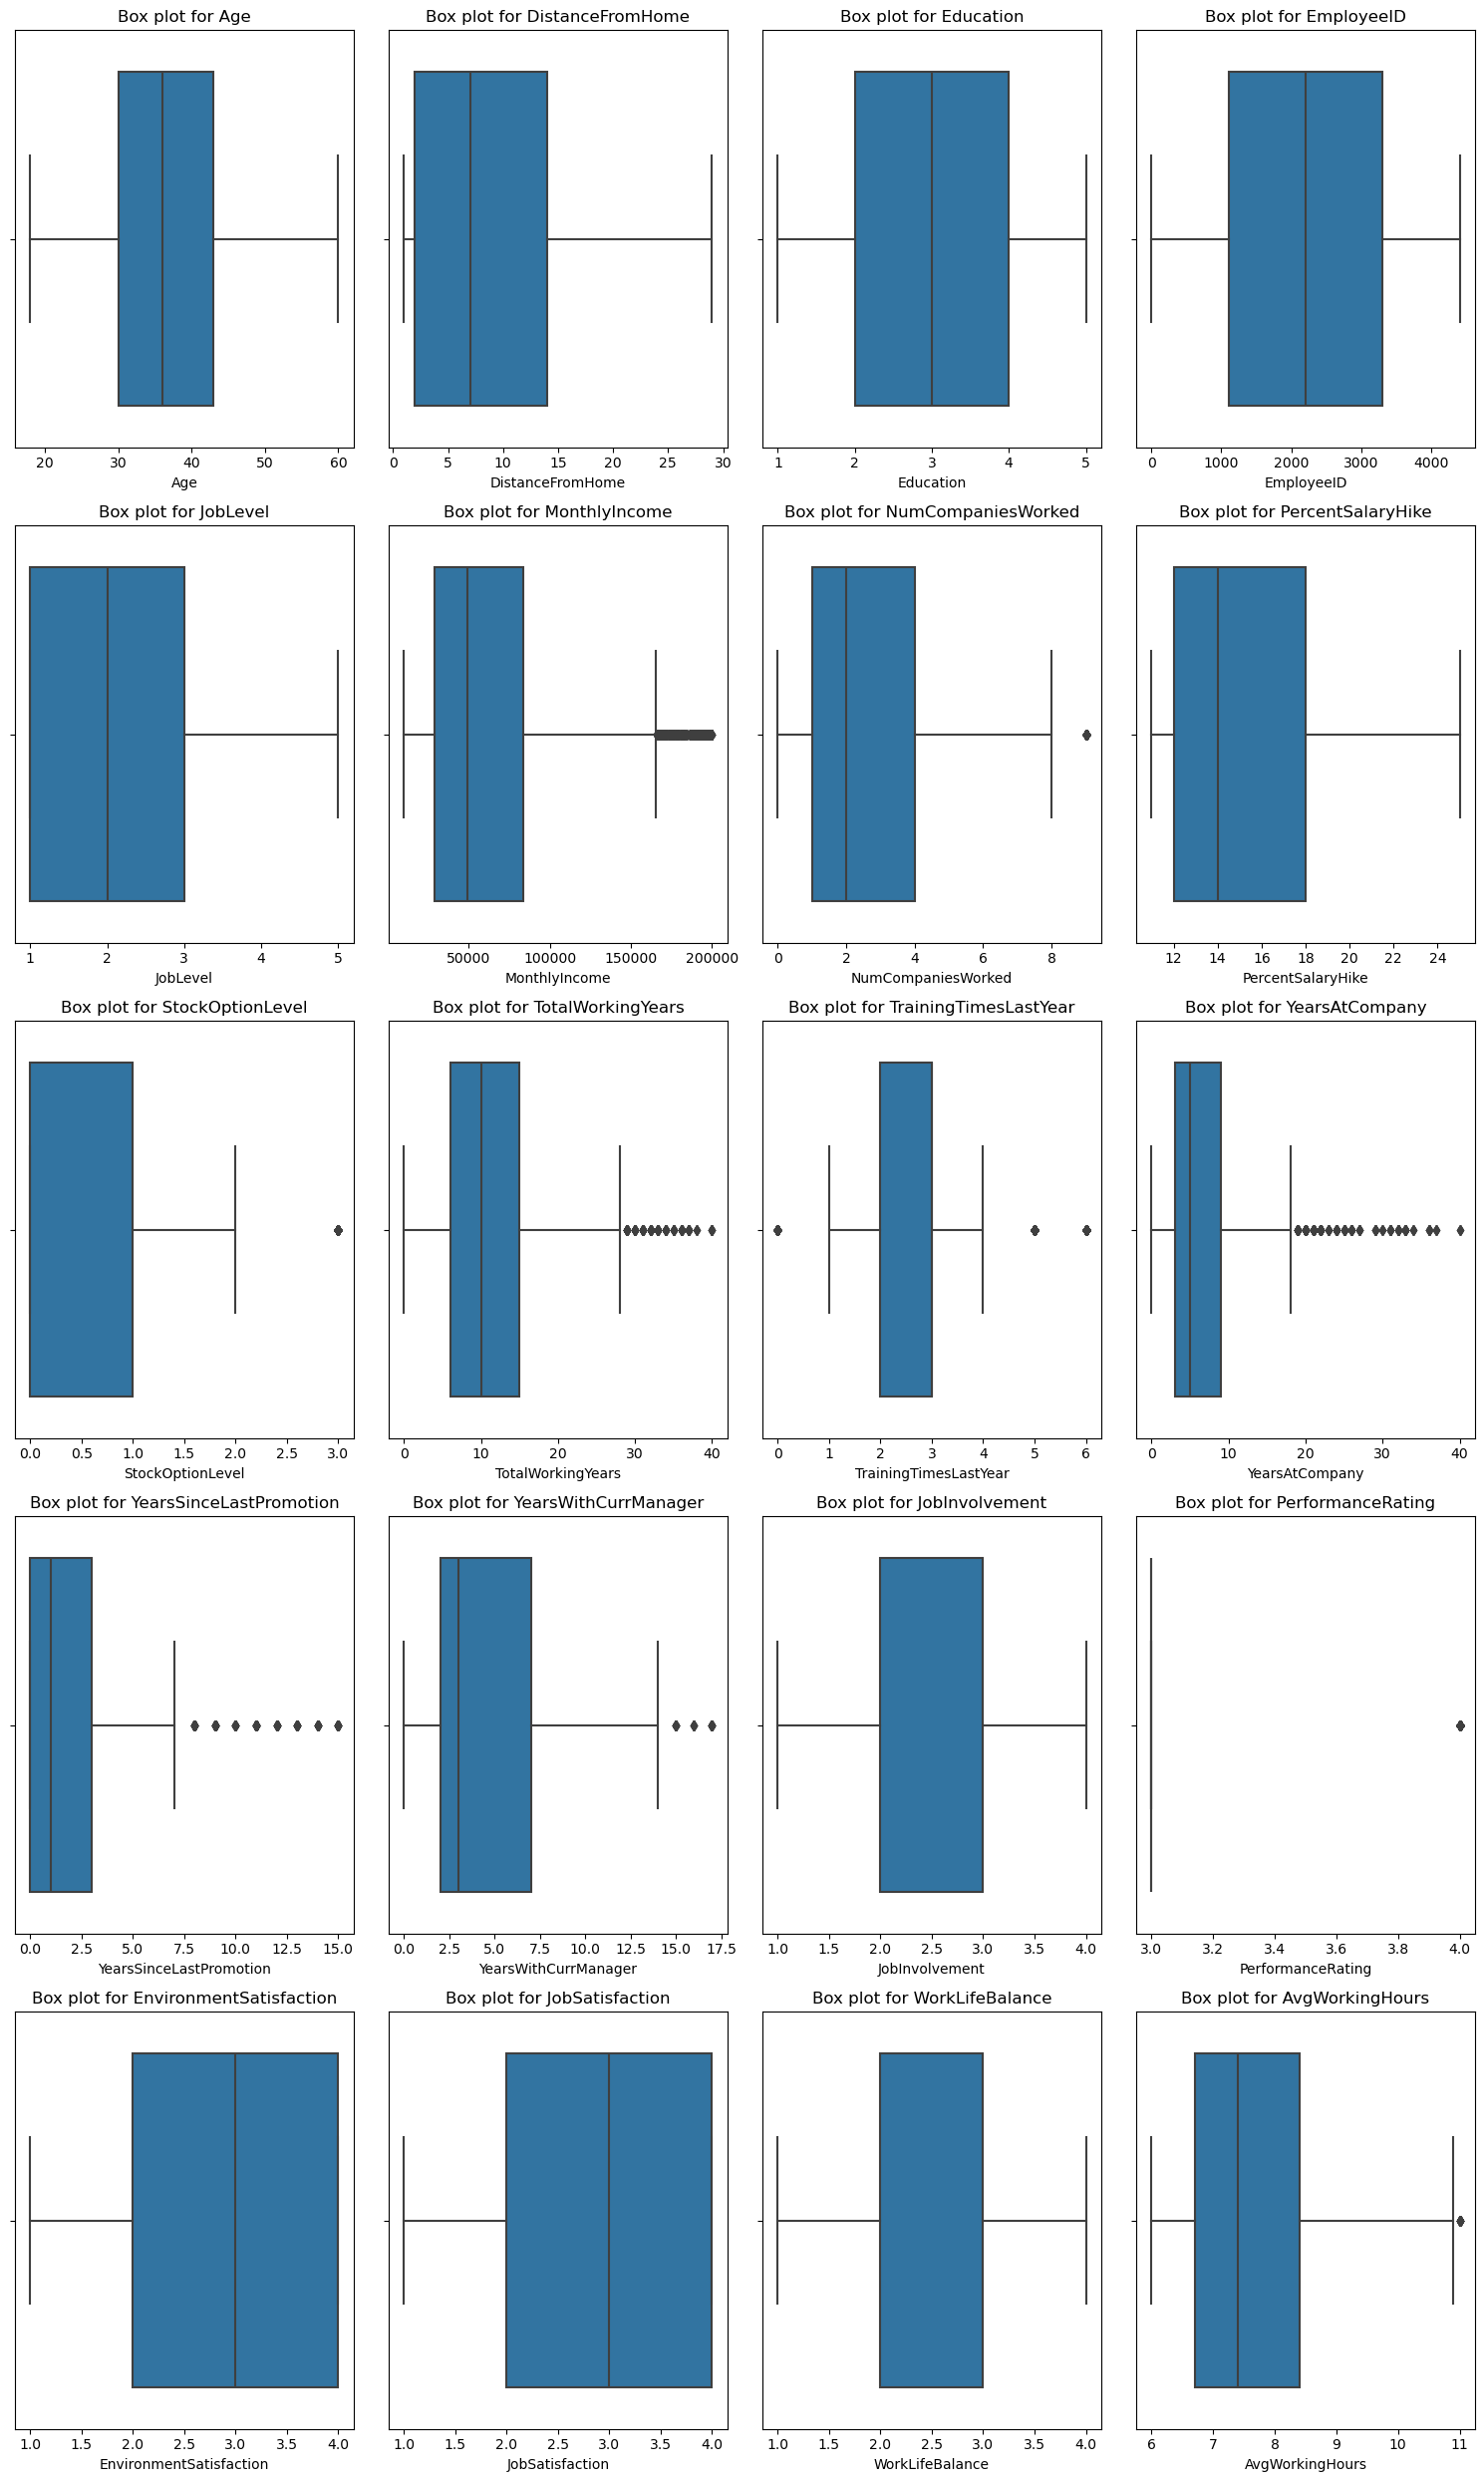

In [218]:
import math

num_columns = len(numerical_cols)
num_rows = math.ceil(num_columns / 4)

plt.figure(figsize=(15, 5 * num_rows))
for idx, column in enumerate(numerical_cols, start=1):
    plt.subplot(num_rows, 4, idx)
    sns.boxplot(x=final_merged_data[column])
    plt.title(f'Box plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [219]:

outliers_count = {}

for column in numerical_cols:
    Q1 = final_merged_data[column].quantile(0.25)
    Q3 = final_merged_data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = final_merged_data[(final_merged_data[column] < lower_bound) | (final_merged_data[column] > upper_bound)]

    outliers_count[column] = len(outliers)

In [220]:
print("Number of outliers in each numerical column:")
for column, count in outliers_count.items():
    print(f"{column}: {count} outliers")


Number of outliers in each numerical column:
Age: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EmployeeID: 0 outliers
JobLevel: 0 outliers
MonthlyIncome: 342 outliers
NumCompaniesWorked: 156 outliers
PercentSalaryHike: 0 outliers
StockOptionLevel: 255 outliers
TotalWorkingYears: 189 outliers
TrainingTimesLastYear: 714 outliers
YearsAtCompany: 312 outliers
YearsSinceLastPromotion: 321 outliers
YearsWithCurrManager: 42 outliers
JobInvolvement: 0 outliers
PerformanceRating: 678 outliers
EnvironmentSatisfaction: 0 outliers
JobSatisfaction: 0 outliers
WorkLifeBalance: 0 outliers
AvgWorkingHours: 30 outliers


Considering the large number of outlier instances present, we would not discard these outlier, instead we would scale these numerical columns in the preprocessing pipeline

## Feature Engineering

Next, we would go on to form new attributes, remove some attributes and combine some attributes to provide more context to our dataset to better summarise trends.

In [221]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

Firstly, due to the similarity in distribution between JobSatisfaction and EnvironmentalSatisfaction, we would go ahead and create a single column that shows the general level of satisfaction of an employee as a sum of both satisfaction columns

In [222]:
final_merged_data['SatisfactionScore'] = round((final_merged_data['JobSatisfaction'] + final_merged_data['EnvironmentSatisfaction'])/2,1)
final_merged_data.drop(['JobSatisfaction', 'EnvironmentSatisfaction'], axis=1, inplace=True)

In [223]:
final_merged_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkLifeBalance,AvgWorkingHours,SatisfactionScore
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3,3,2.0,7.4,3.5
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,6.0,3,5,1,4,2,4,4.0,7.7,2.5
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,5.0,2,5,0,3,3,3,1.0,7.0,2.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,13.0,5,8,7,5,2,3,3.0,7.2,4.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,9.0,2,6,0,4,3,3,3.0,8.0,2.5


**Correlation Check**

Next, we would check the correlation between the input variables and the label variable (Attrition) in order to select the columns with a good correlation with the label column

In [224]:
categorical_columns = [
    'BusinessTravel', 
    'Department', 
    'EducationField', 
    'Gender', 
    'JobRole',
    'JobInvolvement',
    'PerformanceRating',
    'JobLevel',
    'MaritalStatus', 
    'WorkLifeBalance', 
    'SatisfactionScore',
    'Education'
]

continuous_cols = final_merged_data.drop(categorical_columns, axis=1, inplace=False).columns

Here, we would start off by conducting a chi-squared test to see if there is a signficant correlation between the categorical input columns and the Attrition label. This would leave us would the following hypothesis;

H₀: There is no significant association between the input column and the Attrition label.

H₁: There is a significant association between the input column and the Attrition label.

In [225]:
from scipy.stats import chi2_contingency

def chi_square_test(data, target, categorical_columns):
    results = {}
    
    for col in categorical_columns:
        
        contingency_table = pd.crosstab(data[col], data[target])
        
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        results[col] = {'Chi2': chi2, 'p-value': p}
    
    return pd.DataFrame(results).T.sort_values(by='p-value')

In [226]:
chi_square_test(final_merged_data, 'Attrition', categorical_columns)

,Chi2,p-value
MaritalStatus,138.491030,8.453859e-31
SatisfactionScore,134.779777,1.264707e-26
BusinessTravel,72.547241,1.764277e-16
WorkLifeBalance,48.974479,1.320878e-10
EducationField,46.194921,8.288917e-09
Department,29.090275,4.820888e-07
JobRole,25.116314,1.485545e-03
JobInvolvement,8.139110,4.322253e-02
PerformanceRating,2.242160,1.342932e-01
JobLevel,6.269176,1.799277e-01


Here, the columns with a significant association with Attrition can be selected. This would be based on their p-value. Here, columns with a p-value < 0.05 would be selected cause that's a bases to reject the null hypothesis.

In [227]:
rejected_cols = ['PerformanceRating', 'JobLevel', 'Education', 'Gender']
rejected_cols

['PerformanceRating', 'JobLevel', 'Education', 'Gender']

In [228]:
continuous_cols

Index(['Age', 'Attrition', 'DistanceFromHome', 'EmployeeID', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AvgWorkingHours'],
      dtype='object')

Next, using the Point Biserial Correlation test, we can check which numerical columns correlate the most with Attrition. These will be selected based on a high correlation value and a low p-value which is < 0.05

In [229]:
from scipy.stats import pointbiserialr

def point_biserial_corr(data, target, continuous_cols):
    results = {}
    data[target] = data[target].map({'Yes': 1, 'No': 0})
    
    for col in continuous_cols:
        if col == 'NumCompaniesWorked' or col == 'TotalWorkingYears':
            continue
        
        correlation, p_value = pointbiserialr(data[target], data[col])
        results[col] = {'Correlation': correlation, 'p-value': p_value}
    
    return pd.DataFrame(results).T.sort_values(by='p-value')

In [230]:
final_merged_data[continuous_cols]

,Age,Attrition,DistanceFromHome,EmployeeID,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AvgWorkingHours
0,51,No,6,1,131160,1.0,11,0,1.0,6,1,0,0,7.4
1,31,Yes,10,2,41890,0.0,23,1,6.0,3,5,1,4,7.7
2,32,No,17,3,193280,1.0,15,3,5.0,2,5,0,3,7.0
3,38,No,2,4,83210,3.0,11,3,13.0,5,8,7,5,7.2
4,32,No,10,5,23420,4.0,12,2,9.0,2,6,0,4,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,5,4406,60290,3.0,17,1,10.0,5,3,0,2,8.5
4406,29,No,2,4407,26790,2.0,15,0,10.0,2,3,0,2,6.1
4407,25,No,25,4408,37020,0.0,20,0,5.0,4,4,1,2,7.7
4408,42,No,18,4409,23980,0.0,14,1,10.0,2,9,7,8,9.5


In [231]:
point_biserial_corr(final_merged_data, 'Attrition', continuous_cols=continuous_cols)

,Correlation,p-value
Attrition,1.000000,0.000000e+00
AvgWorkingHours,0.201730,1.012398e-41
Age,-0.159205,1.996802e-26
YearsWithCurrManager,-0.156199,1.733932e-25
YearsAtCompany,-0.134392,3.163883e-19
TrainingTimesLastYear,-0.049431,1.024706e-03
YearsSinceLastPromotion,-0.033019,2.833034e-02
PercentSalaryHike,0.032533,3.074339e-02
MonthlyIncome,-0.031176,3.842748e-02
DistanceFromHome,-0.009730,5.182860e-01


In [232]:
print(final_merged_data[['NumCompaniesWorked', 'TotalWorkingYears']].isnull().sum())


NumCompaniesWorked    19
TotalWorkingYears      9
dtype: int64


Here, majority of the numeric columns have correlation values of less than 0.2 which is not very strong and columns that have a very low correlation value have p-values above 0.05 meaning that this correlation score is not enough information to reject the null hypothesis.

For this reason, all numerical columns would be considered in the final dataset, apart fromt he Employee Id column which would be removed.

In [233]:
rejected_cols.append('EmployeeID')
rejected_cols

['PerformanceRating', 'JobLevel', 'Education', 'Gender', 'EmployeeID']

In [234]:
final_merged_data.drop(rejected_cols, axis=1, inplace=True)
final_merged_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,WorkLifeBalance,AvgWorkingHours,SatisfactionScore
0,51,0,Travel_Rarely,Sales,6,Life Sciences,Healthcare Representative,Married,131160,1.0,...,0,1.0,6,1,0,0,3,2.0,7.4,3.5
1,31,1,Travel_Frequently,Research & Development,10,Life Sciences,Research Scientist,Single,41890,0.0,...,1,6.0,3,5,1,4,2,4.0,7.7,2.5
2,32,0,Travel_Frequently,Research & Development,17,Other,Sales Executive,Married,193280,1.0,...,3,5.0,2,5,0,3,3,1.0,7.0,2.0
3,38,0,Non-Travel,Research & Development,2,Life Sciences,Human Resources,Married,83210,3.0,...,3,13.0,5,8,7,5,2,3.0,7.2,4.0
4,32,0,Travel_Rarely,Research & Development,10,Medical,Sales Executive,Single,23420,4.0,...,2,9.0,2,6,0,4,3,3.0,8.0,2.5


In [235]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   JobRole                  4410 non-null   object 
 7   MaritalStatus            4410 non-null   object 
 8   MonthlyIncome            4410 non-null   int64  
 9   NumCompaniesWorked       4391 non-null   float64
 10  PercentSalaryHike        4410 non-null   int64  
 11  StockOptionLevel         4410 non-null   int64  
 12  TotalWorkingYears        4401 non-null   float64
 13  TrainingTimesLastYear    4410 non-null   int64  
 14  YearsAtCompany          

## Preprocessing Pipeline

Here, we would create and apply a preprocessing pipeline focused on dealing with missing values for both numerical and categorical data as well as dealing with scaling numerical data and encoding categorical data either with oneHotEncoding or OrdinalEncoding. 

In [236]:
y_data = final_merged_data['Attrition']
X_data = final_merged_data.drop('Attrition', axis=1, inplace=False)

In [237]:
categorical_columns = [
    'BusinessTravel', 
    'Department', 
    'EducationField', 
    'JobRole',
    'JobInvolvement',
    'MaritalStatus', 
    'WorkLifeBalance', 
    'SatisfactionScore',
]

continuous_cols = X_data.drop(categorical_columns, axis=1, inplace=False).columns
X_data[continuous_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   DistanceFromHome         4410 non-null   int64  
 2   MonthlyIncome            4410 non-null   int64  
 3   NumCompaniesWorked       4391 non-null   float64
 4   PercentSalaryHike        4410 non-null   int64  
 5   StockOptionLevel         4410 non-null   int64  
 6   TotalWorkingYears        4401 non-null   float64
 7   TrainingTimesLastYear    4410 non-null   int64  
 8   YearsAtCompany           4410 non-null   int64  
 9   YearsSinceLastPromotion  4410 non-null   int64  
 10  YearsWithCurrManager     4410 non-null   int64  
 11  AvgWorkingHours          4410 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 413.6 KB


In [238]:
num_categorical_cols = X_data[categorical_columns].select_dtypes(include=['int64', 'float64']).columns
X_data[num_categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   JobInvolvement     4410 non-null   int64  
 1   WorkLifeBalance    4372 non-null   float64
 2   SatisfactionScore  4365 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 103.5 KB


In [239]:
str_categorical_cols = X_data[categorical_columns].select_dtypes(include=['object']).columns
X_data[str_categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BusinessTravel  4410 non-null   object
 1   Department      4410 non-null   object
 2   EducationField  4410 non-null   object
 3   JobRole         4410 non-null   object
 4   MaritalStatus   4410 non-null   object
dtypes: object(5)
memory usage: 172.4+ KB


Now that the data has been segmented into continous, numerical categorical, and string categorical, I would go ahead and create a pipeline for encoding, imputing, and scaling the data.

In [240]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [241]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

str_categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

In [242]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, continuous_cols),
        ('str_cat', str_categorical_pipeline, str_categorical_cols),
        ('num_cat', num_categorical_pipeline, num_categorical_cols)
    ]
)

## Train, Validate, Test Split

Here, we would split our dataset into training, validation, and testing sets in a 60%, 20%, and 20% ratio respectively while mainting the distribution of the data based on the label column -- Attrition

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.4, stratify=y_data, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [245]:
print(pd.DataFrame(X_train).shape)
print(pd.DataFrame(X_val).shape)
print(pd.DataFrame(X_test).shape)

(2646, 20)
(882, 20)
(882, 20)


In [246]:
print(pd.DataFrame(y_train).shape)
print(pd.DataFrame(y_val).shape)
print(pd.DataFrame(y_test).shape)

(2646, 1)
(882, 1)
(882, 1)


Now that the data has been appropriately split into training, validation, and testing, the next step would be to train and transform the different sets with the preprocessor pipeline

In [247]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'A...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')),
                                ('num_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index(['JobInvolvement', 'WorkLifeBalance', 'SatisfactionScore'], dtype='object'))])

In [248]:
X_train_tranformed = preprocessor.transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

## Model Creation and Evaluation

Here, we would select, justify our selection, train, and evaluate models for the task

In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [250]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tranformed, y_train)

RandomForestClassifier(random_state=42)

In [251]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [260]:
y_pred_rf = rf_model.predict(X_test_transformed)
y_prob_rf = rf_model.predict_proba(X_test_transformed)[:, 1]  # Probability for ROC AUC

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

Random Forest Results:
Accuracy: 0.9705215419501134
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       740
           1       0.98      0.83      0.90       142

    accuracy                           0.97       882
   macro avg       0.98      0.91      0.94       882
weighted avg       0.97      0.97      0.97       882

Confusion Matrix:
 [[738   2]
 [ 24 118]]
ROC AUC Score: 0.9841121050628093


In [254]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tranformed, y_train)

LogisticRegression(random_state=42)

In [259]:
y_pred_lr = lr_model.predict(X_test_transformed)
y_prob_lr = lr_model.predict_proba(X_test_transformed)[:, 1]

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Results:
Accuracy: 0.8582766439909297
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       740
           1       0.63      0.29      0.40       142

    accuracy                           0.86       882
   macro avg       0.75      0.63      0.66       882
weighted avg       0.84      0.86      0.84       882

Confusion Matrix:
 [[716  24]
 [101  41]]
ROC AUC Score: 0.8021697754092121


In [261]:
from sklearn.ensemble import GradientBoostingClassifier

In [262]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_tranformed, y_train)

y_pred_gb = gb_model.predict(X_test_transformed)
y_prob_gb = gb_model.predict_proba(X_test_transformed)[:, 1]  # Probability for ROC AUC

print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_gb))

Gradient Boosting Results:
Accuracy: 0.8990929705215419
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       740
           1       0.85      0.45      0.59       142

    accuracy                           0.90       882
   macro avg       0.88      0.72      0.77       882
weighted avg       0.90      0.90      0.89       882

Confusion Matrix:
 [[729  11]
 [ 78  64]]
ROC AUC Score: 0.899514655500571


## Model Creation and Training

Now that my data has been properly preprocessed, I would go ahead and build different models, train them and compare them to each other in order to select an appropriate model.

These classifier model include;

1. Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)


In [265]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

#### Random Forest

Accuracy

In [266]:
rf_cv_scores=cross_val_score(rf_model, X_train_tranformed, y_train, cv=5, scoring='accuracy' )
print("Random Forest Cross-Validation ROC AUC Scores:", rf_cv_scores)
print("Mean ROC AUC:", rf_cv_scores.mean())

Random Forest Cross-Validation ROC AUC Scores: [0.96603774 0.95274102 0.96786389 0.96786389 0.95463138]
Mean ROC AUC: 0.9618275849769947


Precision

In [269]:
rf_cv_scores=cross_val_score(rf_model, X_train_tranformed, y_train, cv=5, scoring='precision' )
print("Random Forest Cross-Validation ROC AUC Scores:", rf_cv_scores)
print("Mean ROC AUC:", rf_cv_scores.mean())

Random Forest Cross-Validation ROC AUC Scores: [0.98571429 0.94117647 0.98571429 1.         0.984375  ]
Mean ROC AUC: 0.9793960084033614


#### Gradient Boosting Machine

Accuracy

In [268]:
gb_cv_scores = cross_val_score(gb_model, X_train_tranformed, y_train, cv=5, scoring='accuracy')
print("Gradient Boosting Cross-Validation Accuracy Scores:", gb_cv_scores)
print("Mean Accuracy:", gb_cv_scores.mean())

Gradient Boosting Cross-Validation Accuracy Scores: [0.89811321 0.90359168 0.90359168 0.88468809 0.8979206 ]
Mean Accuracy: 0.8975810536077325


Precision

In [270]:
gb_cv_scores = cross_val_score(gb_model, X_train_tranformed, y_train, cv=5, scoring='precision')
print("Gradient Boosting Cross-Validation Accuracy Scores:", gb_cv_scores)
print("Mean Accuracy:", gb_cv_scores.mean())

Gradient Boosting Cross-Validation Accuracy Scores: [0.84782609 0.81481481 0.84       0.76086957 0.88095238]
Mean Accuracy: 0.8288925695882217


Comparing the accuracy values of both models, it is evident that the Rondom Forest model is more accurate than Gradient Boosting Machine model.



Random Forest Hyperparameter Tuning

In [ ]:
# Random Forest Hyperparameter Tuning
rf_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
rf_search = RandomizedSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
rf_search.fit(X_train_tranformed, y_train)

In [277]:
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Create a Random Forest classifier
rf_model = RandomForestClassifier()



In [278]:
# Define the hyperparameter distributions for Random Forest
rf_param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [279]:
# Create RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=rf_param_dist,
    n_iter=100,  # You might want to increase this for a more thorough search
    cv=5,
    scoring='roc_auc',  # Use ROC AUC as the scoring metric (or choose another)
    n_jobs=-1,  # Use all available cores for parallel processing
    random_state=42
)


In [280]:
# Perform cross-validation using cross_validate
rf_cv_results = cross_validate(
    rf_random_search,
    X_train_tranformed,
    y_train,
    cv=5,  # You can adjust the number of folds
    scoring=['roc_auc', 'f1'],  # Get multiple scores if needed
    return_estimator=True  # Important to get the best estimators from each fold
)


In [281]:
# Find the best estimator based on the chosen scoring metric (e.g., ROC AUC)
best_index = rf_cv_results['test_roc_auc'].argmax()
best_rf_model = rf_cv_results['estimator'][best_index]


In [285]:
# Print the best hyperparameters and scores from the best model
print("Best Hyperparameters (from best fold):", best_rf_model.best_params_)
print("Best ROC AUC Score (from best fold):", rf_cv_results['test_roc_auc'][best_index])
print("Average ROC AUC Score (across all folds):", rf_cv_results['test_roc_auc'].mean())
print("Best F1 Score (from best fold):", rf_cv_results['test_f1'][best_index])
print("Average F1 Score (across all folds):", rf_cv_results['test_f1'].mean())


Best Hyperparameters (from best fold): {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 288}
Best ROC AUC Score (from best fold): 0.985936517913262
Average ROC AUC Score (across all folds): 0.981522607595846
Best F1 Score (from best fold): 0.8774193548387097
Average F1 Score (across all folds): 0.8683288280629473


Gradient Bossting Machine ( Fit )

In [286]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

In [287]:
# --- Option 1: GridSearchCV (for specific values) ---

# Define the hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],  # Example: Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Example: Learning rate
    'max_depth': [3, 4, 5],  # Example: Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Example: Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Example: Minimum samples at leaf node
    'max_features': ['sqrt', 'log2', None],  # Example: Features to consider for splits
    'subsample': [0.8, 0.9, 1.0] # Example: Fraction of samples used for fitting trees
}

In [288]:
# Create GridSearchCV object
gb_grid_search = GridSearchCV(
    gb_model,
    param_grid=gb_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Or another suitable scoring metric
    n_jobs=-1  # Use all available cores for parallel processing
)

In [290]:
# Fit the GridSearchCV object to the data
gb_grid_search.fit(X_train_tranformed, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc')

In [291]:
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters (Grid Search):", gb_grid_search.best_params_)
print("Best ROC AUC Score (Grid Search):", gb_grid_search.best_score_)


Best Hyperparameters (Grid Search): {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best ROC AUC Score (Grid Search): 0.9644480811110988


In [292]:
# Get the best model
best_gb_model_grid = gb_grid_search.best_estimator_


In [293]:
# --- Option 2: RandomizedSearchCV (for sampling from distributions) ---

# Define the hyperparameter distributions for Gradient Boosting
gb_param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.2),  # Sample from a uniform distribution
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.8, 0.9, 1.0]
}


In [294]:
# Create RandomizedSearchCV object
gb_random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=gb_param_dist,
    n_iter=100,  # Number of random combinations to try (adjust as needed)
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)


In [296]:
# Fit the RandomizedSearchCV object to the data
gb_random_search.fit(X_train_tranformed, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DDD6048BD0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DDAD8DFE50>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DDC43504D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DDB7CB8490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DDC99A3910>,
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc')

In [297]:
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters (Randomized Search):", gb_random_search.best_params_)
print("Best ROC AUC Score (Randomized Search):", gb_random_search.best_score_)


Best Hyperparameters (Randomized Search): {'learning_rate': 0.0816325436065681, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 428, 'subsample': 0.9}
Best ROC AUC Score (Randomized Search): 0.962646596456415


In [298]:
# Get the best model
best_gb_model_random = gb_random_search.best_estimator_


Gradient Bossting Machine ( Cross-Val )

In [299]:
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier()


In [300]:
# Define the hyperparameter distributions for Gradient Boosting
gb_param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.2),  # Sample from a uniform distribution
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.8, 0.9, 1.0]
}


In [301]:
# Create RandomizedSearchCV object
gb_random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=gb_param_dist,
    n_iter=100,  # Number of random combinations to try (adjust as needed)
    cv=5,
    scoring='roc_auc',  # Or another suitable scoring metric
    n_jobs=-1,  # Use all available cores for parallel processing
    random_state=42
)


In [303]:
# Perform cross-validation using cross_validate
cv_results = cross_validate(
    gb_random_search,
    X_train_tranformed,
    y_train,
    cv=5,  # You can adjust the number of folds
    scoring=['roc_auc', 'f1'],  # Get multiple scores if needed
    return_estimator=True  # Important to get the best estimators from each fold
)


In [304]:
# Find the best estimator based on the chosen scoring metric (e.g., ROC AUC)
best_index = cv_results['test_roc_auc'].argmax()
best_gb_model = cv_results['estimator'][best_index]


In [305]:
# Print the best hyperparameters and scores from the best model
print("Best Hyperparameters (from best fold):", best_gb_model.best_params_)
print("Best ROC AUC Score (from best fold):", cv_results['test_roc_auc'][best_index])
print("Average ROC AUC Score (across all folds):", cv_results['test_roc_auc'].mean())
print("Best F1 Score (from best fold):", cv_results['test_f1'][best_index])
print("Average F1 Score (across all folds):", cv_results['test_f1'].mean())


Best Hyperparameters (from best fold): {'learning_rate': 0.1459689559800492, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 335, 'subsample': 0.8}
Best ROC AUC Score (from best fold): 0.9721780604133545
Average ROC AUC Score (across all folds): 0.9614253270294502
Best F1 Score (from best fold): 0.8606060606060607
Average F1 Score (across all folds): 0.8681706263833397


In [306]:
y_pred = best_gb_model.predict(X_test_transformed)